In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import math
import numpy as np
from sympy import *
from scipy.optimize import curve_fit
from propagazione import *
def model(x, a, b):
    return a + b*x
x,y,z,w,u = symbols('x y z w u')
df = pd.read_csv('Dati 5a esp.csv')
df.insert(6,"cosalfa",np.cos(df['alfa rad'])**2,true)
f=cos(x)**2
errcosalfa=np.empty(df["cosalfa"].size)
for i in range(df["cosalfa"].size):
    x_val=df["alfa rad"][i]
    y_val= 0
    z_val= 0
    w_val=0
    u_val=0
    sigmay= 0
    sigmaz= 0
    sigmaw=0
    sigmau= 0
    sigmax=df["err alfa rad"][i]
    sigma1=np.array([sigmax,sigmay,sigmaz,sigmaw,sigmau])
    errcosalfa[i]=(propmax(f,x_val,y_val,z_val,w_val,u_val,sigma1))
    i+=1
errcosalfa[0]=0.0012
errcosalfa[8]=0.013
errcosalfa[9]=0.0012
df.insert(7,"errcosalfa",errcosalfa,true)
df

,Pos ang,err pos ang,alfa,err alfa,alfa rad,err alfa rad,cosalfa,errcosalfa,I,err I
0,141,1,0,2,0.000000,0.034907,1.000000e+00,0.001200,109.9,1.3
1,151,1,10,2,0.174533,0.034907,9.698463e-01,0.011939,106.3,1.3
2,161,1,20,2,0.349066,0.034907,8.830222e-01,0.022438,97.0,1.2
3,171,1,30,2,0.523599,0.034907,7.500000e-01,0.030230,82.5,1.0
4,181,1,40,2,0.698132,0.034907,5.868241e-01,0.034376,64.8,0.8
5,191,1,50,2,0.872665,0.034907,4.131759e-01,0.034376,45.9,0.7
6,201,1,60,2,1.047198,0.034907,2.500000e-01,0.030230,28.4,0.5
7,211,1,70,2,1.221730,0.034907,1.169778e-01,0.022438,13.4,0.3
8,221,1,80,2,1.396263,0.034907,3.015369e-02,0.013000,4.1,0.2
9,231,1,90,2,1.570796,0.034907,1.219044e-29,0.001200,0.0,0.2


In [25]:
colors = ['b', 'c', 'y', 'm', 'r']
a_fit,cov=curve_fit(model,df.I,df.cosalfa,absolute_sigma=False)

La pendenza = (0.00916 ± 0.00002)$\mu A$
L\'intercetta = (-0.0057 ± 0.0015)$\mu A$
$I_0$=109.2
$I_F$=0.6


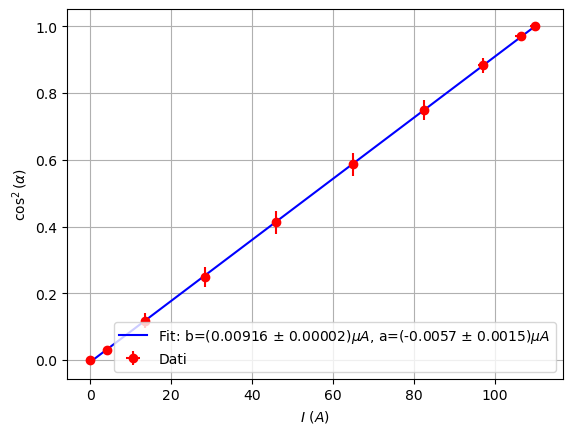

In [37]:
inter = a_fit[0]
slope = a_fit[1]
d_inter=np.sqrt(cov[0][0])
d_slope=np.sqrt(cov[1][1])
a_slope=3*d_slope
yfit = inter + slope*(df.I)
plt.errorbar(df.I,df.cosalfa,xerr=df["err I"],yerr=errcosalfa,fmt='o',label='Dati',color='red')
plt.plot(df.I,yfit,color='blue',label=r'Fit: b=({:.5f} $\pm$ {:.5f})$\mu A$, a=({:.4f} $\pm$ {:.4f})$\mu A$'.format(slope,d_slope,inter,d_inter))
plt.xlabel(r'$I \ (A)$ ')
plt.ylabel(r'$\cos^2(\alpha) $')
plt.grid()
print(r'La pendenza = ({:.5f} ± {:.5f})$\mu A$'.format(slope,d_slope))
print(r'L\'intercetta = ({:.4f} ± {:.4f})$\mu A$'.format(inter,d_inter))
plt.legend(loc='best')
i0=slope**(-1)
i_f=-inter*i0
print(f'$I_0$={slope**(-1):.1f}')
print(f'$I_F$={i_f:.1f}')
plt.show()